In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("bankruptcy-prevention.csv", sep=';')

df.head(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
5,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy
6,1.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
7,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
8,1.0,1.0,0.0,0.5,0.0,0.0,bankruptcy
9,1.0,1.0,0.0,0.5,0.0,1.0,bankruptcy


In [3]:
bankruptcy_cases = df[df['class'] == 'bankruptcy']
non_bankruptcy_cases = df[df['class'] == 'non-bankruptcy']

bankruptcy_statistics = bankruptcy_cases.describe()


non_bankruptcy_statistics = non_bankruptcy_cases.describe()

print("Statistics for Bankruptcy Cases:")
print(bankruptcy_statistics)

print("\nStatistics for Non-Bankruptcy Cases:")
print(non_bankruptcy_statistics)


Statistics for Bankruptcy Cases:
       industrial_risk  management_risk  financial_flexibility  credibility  \
count       107.000000       107.000000             107.000000   107.000000   
mean          0.626168         0.789720               0.028037     0.107477   
std           0.412616         0.336725               0.134441     0.238193   
min           0.000000         0.000000               0.000000     0.000000   
25%           0.500000         0.500000               0.000000     0.000000   
50%           0.500000         1.000000               0.000000     0.000000   
75%           1.000000         1.000000               0.000000     0.000000   
max           1.000000         1.000000               1.000000     1.000000   

       competitiveness  operating_risk  
count       107.000000      107.000000  
mean          0.018692        0.710280  
std           0.095296        0.388741  
min           0.000000        0.000000  
25%           0.000000        0.500000  
50%      

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64


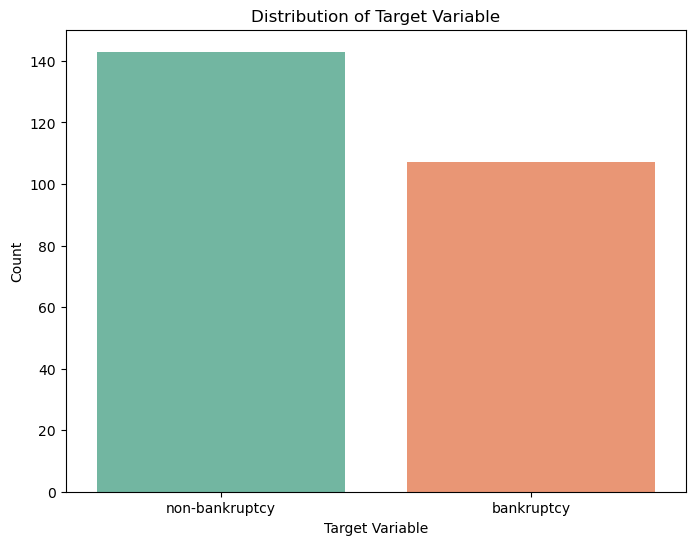

In [5]:
target_counts = df['class'].value_counts()
print(target_counts)

#Plotting the counts
plt.figure(figsize=(8,6))
sns.countplot(x='class', data=df, palette='Set2', order=target_counts.index)  # Assuming 'class' is the column name
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

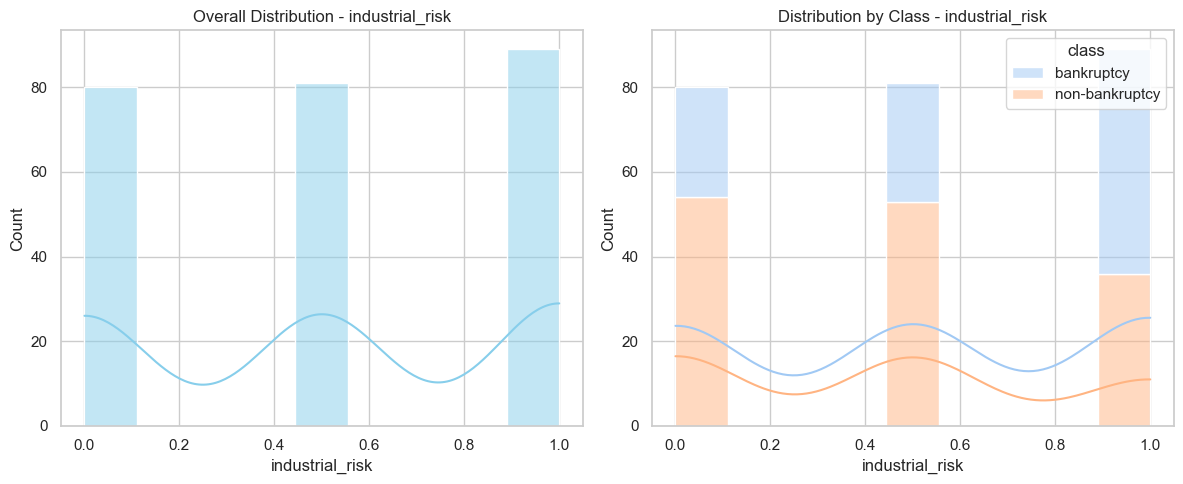

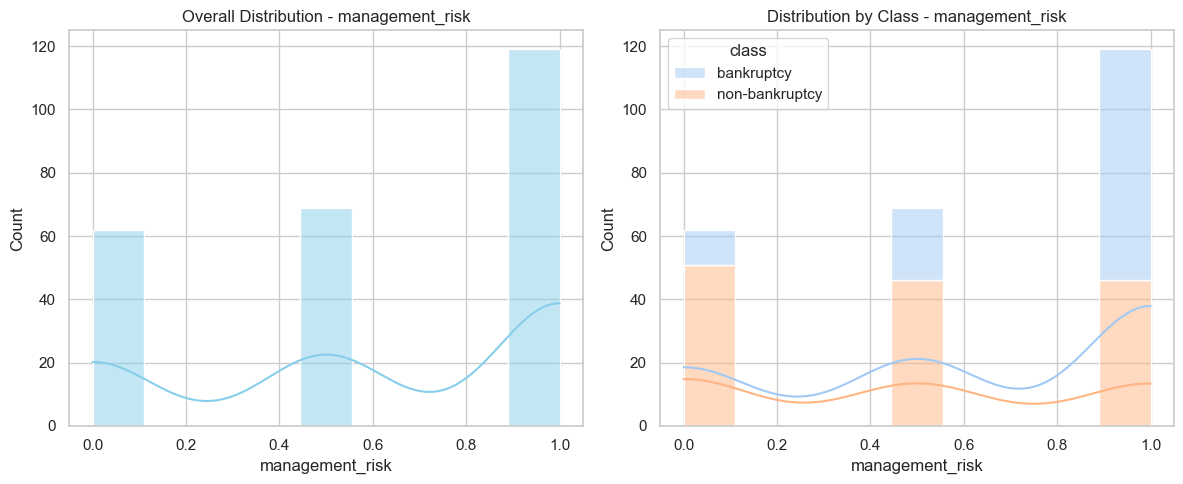

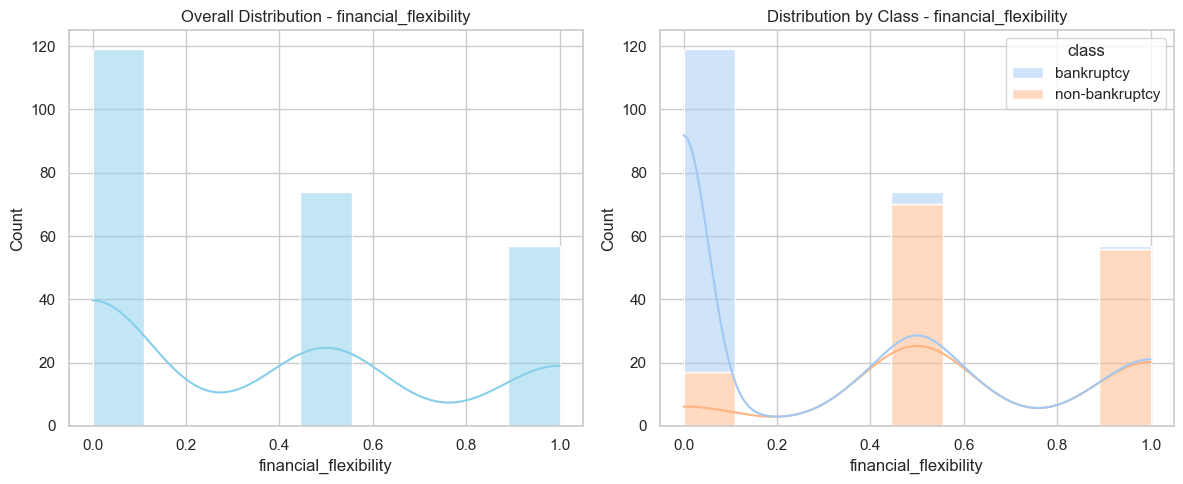

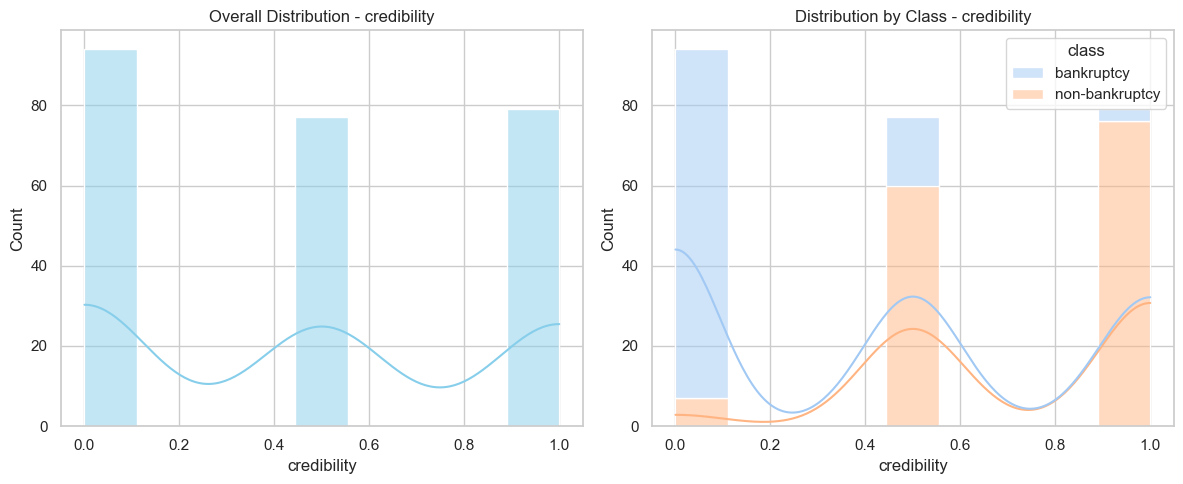

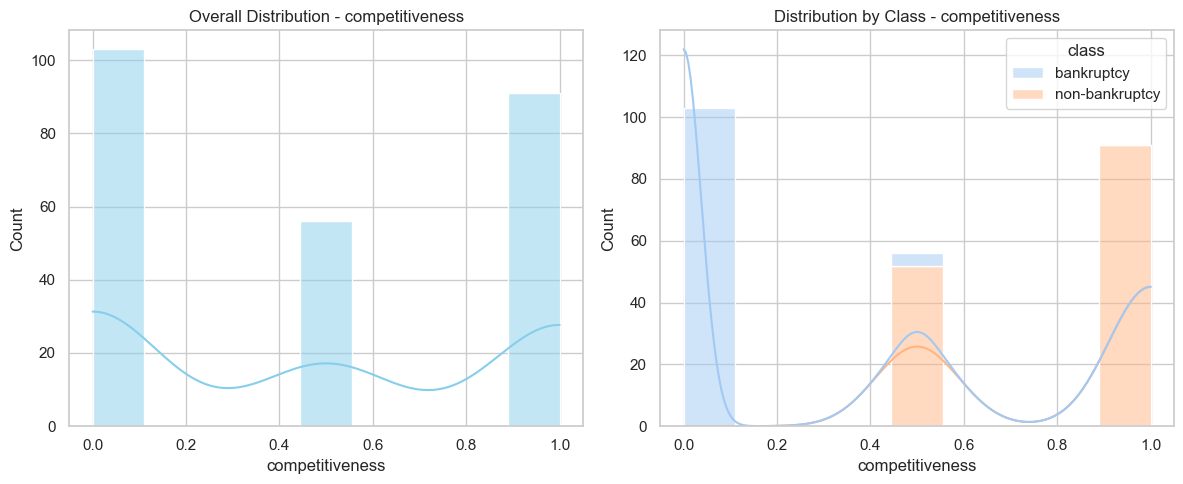

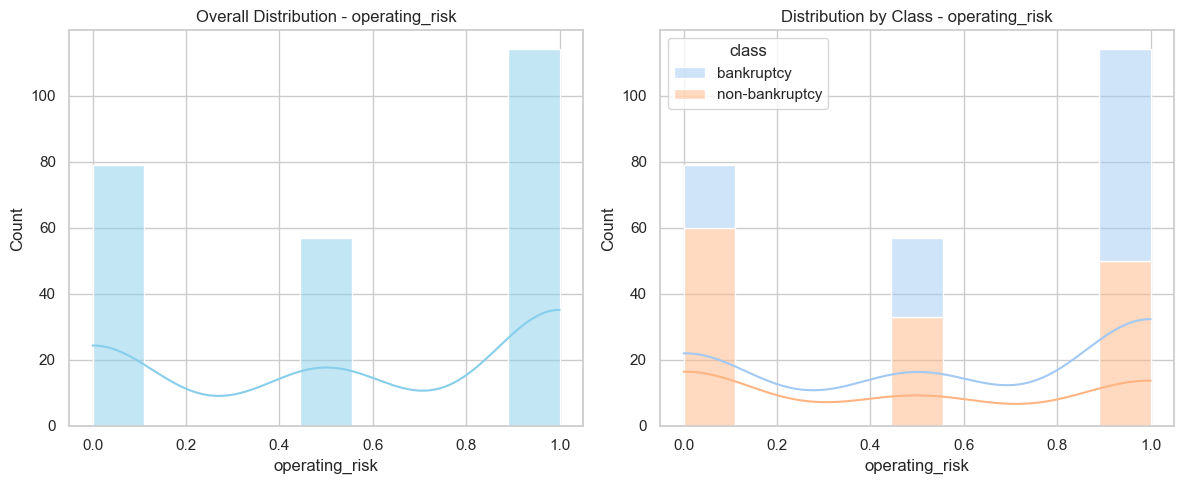

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Select numeric columns for plotting
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot the distributions for each feature
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Plot the overall distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Overall Distribution - {column}')

    # Plot the distribution for bankruptcy and non-bankruptcy cases
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=column, hue='class', kde=True, multiple='stack', palette='pastel')
    plt.title(f'Distribution by Class - {column}')

    plt.tight_layout()
    plt.show()


<Figure size 1000x500 with 0 Axes>

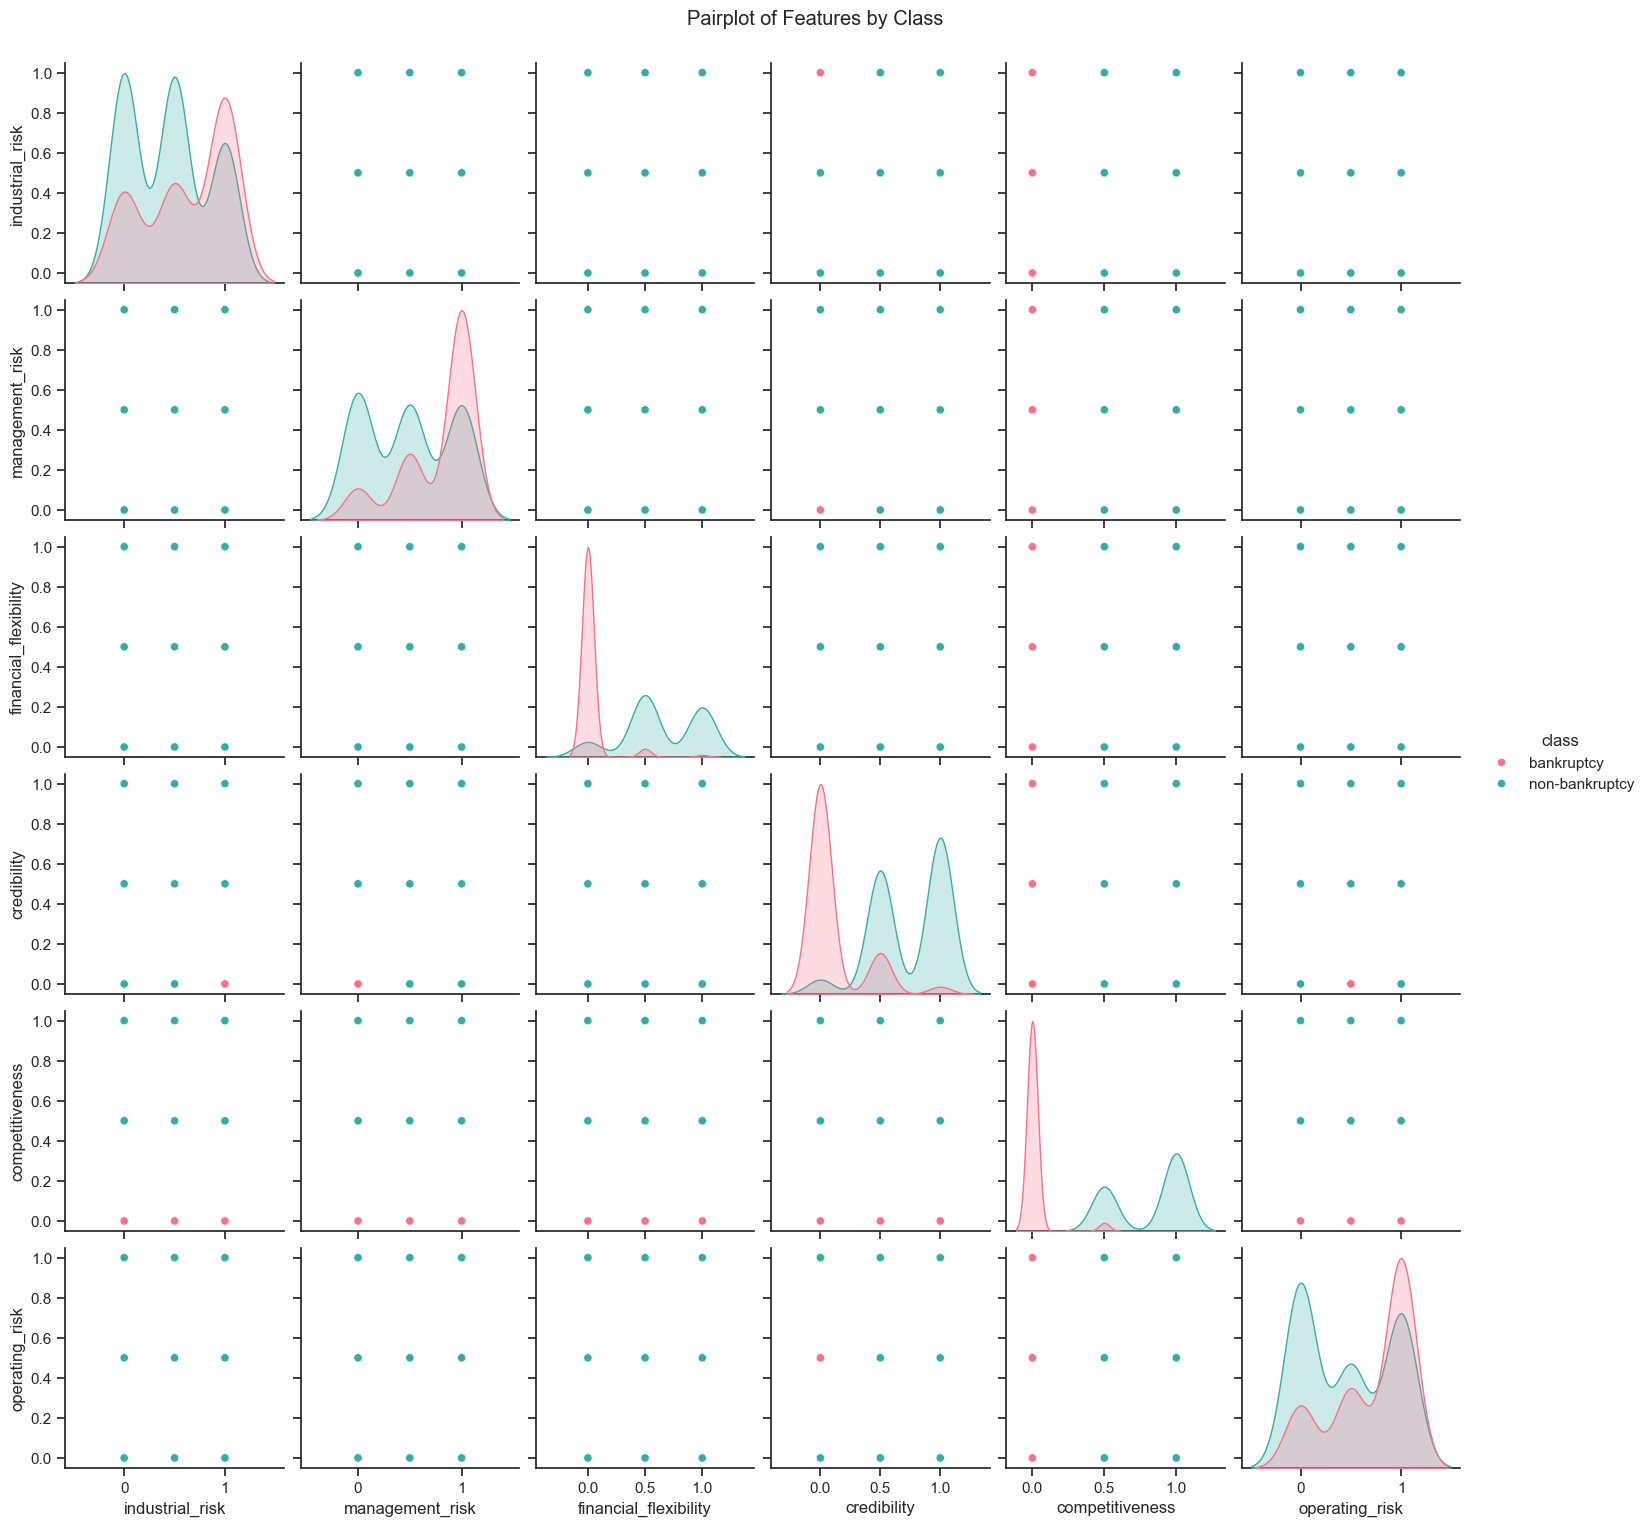

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
plt.figure(figsize=(10, 5))
sns.set(style="ticks")

# Select numeric columns for the pairplot
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot the pairplot
sns.pairplot(df, hue='class', vars=numeric_columns, palette='husl')
plt.suptitle('Pairplot of Features by Class', y=1.02)
plt.show()


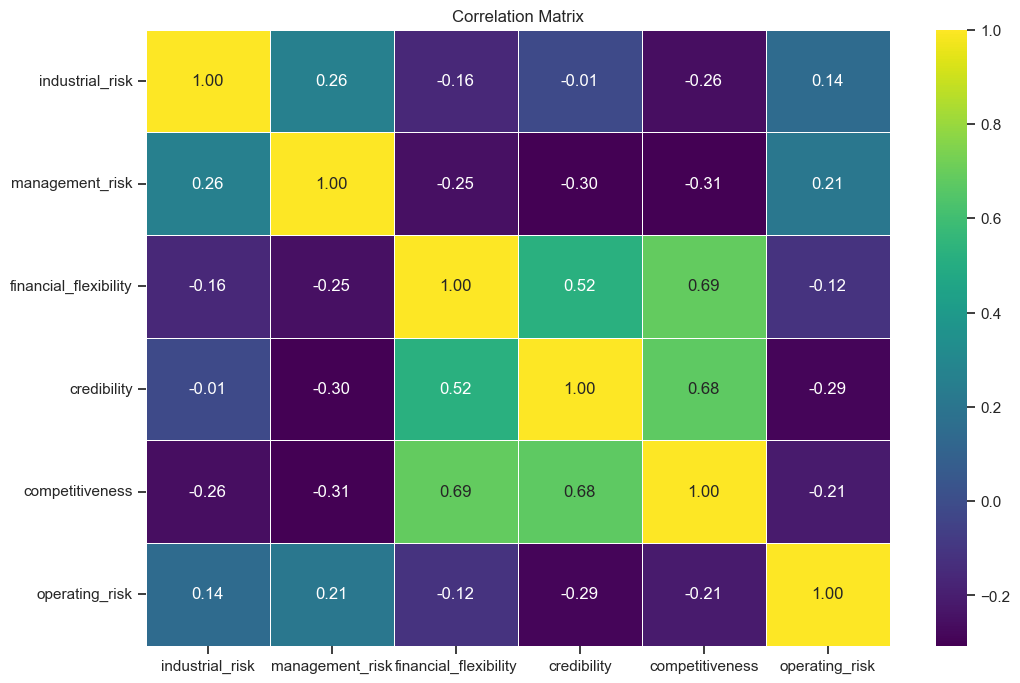

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

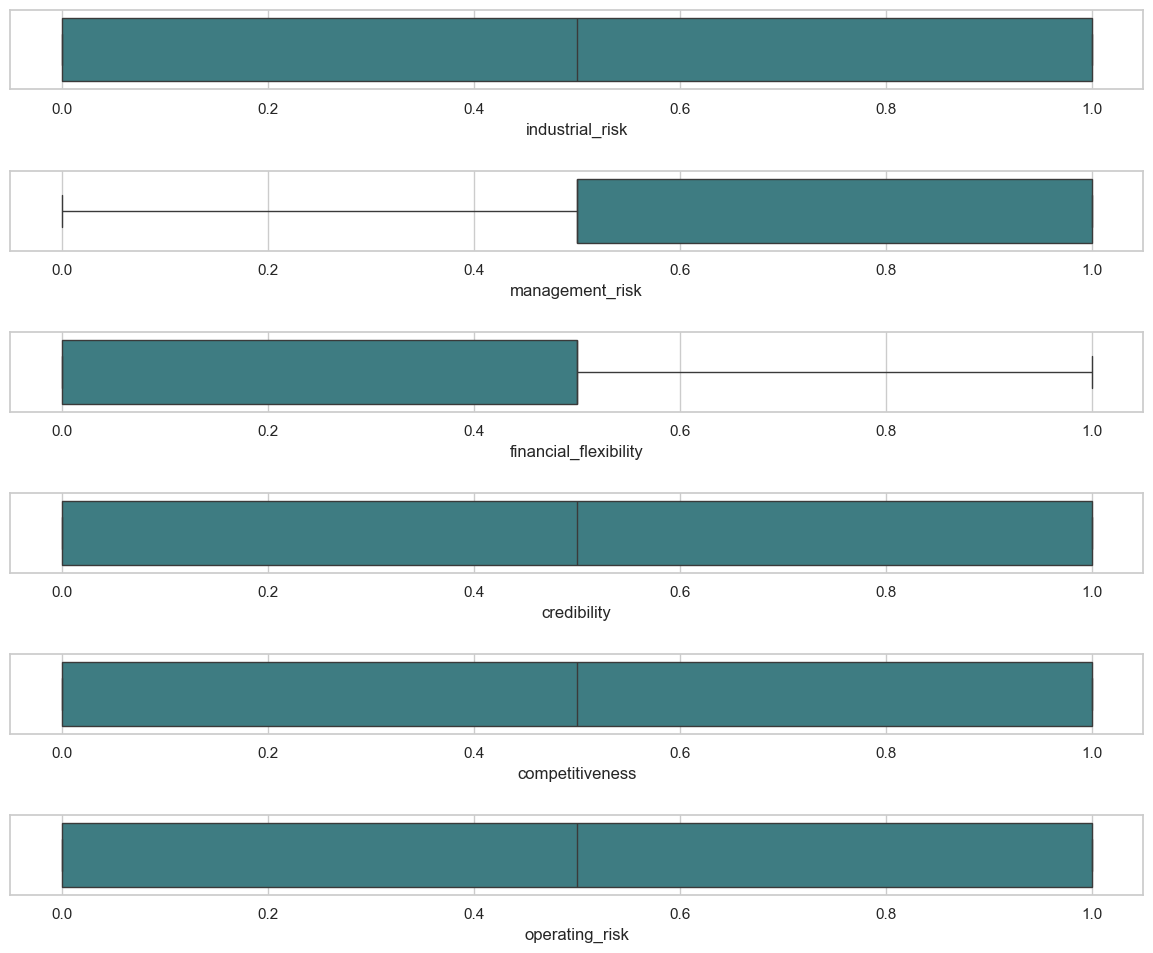

In [9]:
# Set the style for the plots
sns.set(style="whitegrid")

fig, axes = plt.subplots(6, 1, figsize=(12, 10), sharex=False, sharey=False)

sns.boxplot(x='industrial_risk', data=df, palette='crest', ax=axes[0])
sns.boxplot(x='management_risk', data=df, palette='crest', ax=axes[1])
sns.boxplot(x='financial_flexibility', data=df, palette='crest', ax=axes[2])
sns.boxplot(x='credibility', data=df, palette='crest', ax=axes[3])
sns.boxplot(x='competitiveness', data=df, palette='crest', ax=axes[4])
sns.boxplot(x='operating_risk', data=df, palette='crest', ax=axes[5])


plt.tight_layout(pad=2.0)
plt.show()

# Balancing the data using RandomOverSampler

In [10]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

X = df.drop('class', axis=1)
y = df['class']

# Random oversampling
ros = RandomOverSampler(random_state=42)
X_resampled_over, y_resampled_over = ros.fit_resample(X, y)

df = pd.concat([X_resampled_over, y_resampled_over], axis=1)

# Check the balanced class distribution in the new DataFrame
print("Class distribution in df after random oversampling:")
print(df['class'].value_counts())

Class distribution in df after random oversampling:
bankruptcy        143
non-bankruptcy    143
Name: class, dtype: int64


bankruptcy        143
non-bankruptcy    143
Name: class, dtype: int64


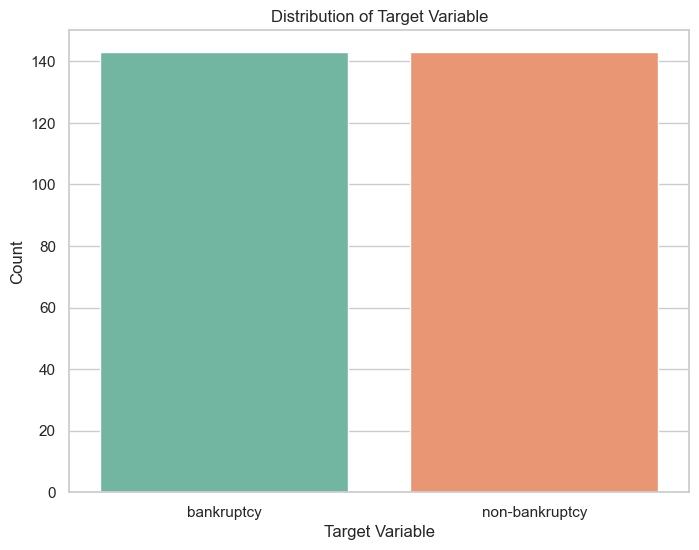

In [11]:
target_counts = df['class'].value_counts()
print(target_counts)

#Plotting the counts
plt.figure(figsize=(8,6))
sns.countplot(x='class', data=df, palette='Set2', order=target_counts.index)  # Assuming 'class' is the column name
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

In [12]:
grouped_stats = df.groupby('class').describe()

# Display descriptive statistics
print("Descriptive Statistics for Balanced Dataset:")
print(grouped_stats)


Descriptive Statistics for Balanced Dataset:
               industrial_risk                                                \
                         count      mean       std  min  25%  50%   75%  max   
class                                                                          
bankruptcy               143.0  0.608392  0.428475  0.0  0.0  0.5  1.00  1.0   
non-bankruptcy           143.0  0.437063  0.393016  0.0  0.0  0.5  0.75  1.0   

               management_risk            ... competitiveness       \
                         count      mean  ...             75%  max   
class                                     ...                        
bankruptcy               143.0  0.779720  ...             0.0  0.5   
non-bankruptcy           143.0  0.482517  ...             1.0  1.0   

               operating_risk                                               
                        count      mean       std  min  25%  50%  75%  max  
class                                            

In [13]:
X_resampled_over

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
281,0.0,0.5,0.0,0.0,0.0,1.0
282,0.0,0.5,0.0,0.0,0.0,1.0
283,0.0,1.0,0.0,0.0,0.5,0.5
284,1.0,1.0,0.0,0.0,0.0,1.0


In [14]:
y_resampled_over

0      bankruptcy
1      bankruptcy
2      bankruptcy
3      bankruptcy
4      bankruptcy
          ...    
281    bankruptcy
282    bankruptcy
283    bankruptcy
284    bankruptcy
285    bankruptcy
Name: class, Length: 286, dtype: object

In [15]:
df.shape

(286, 7)

In [16]:
print(X_resampled_over.shape)
print(y_resampled_over.shape)

(286, 6)
(286,)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled_over, y_resampled_over, test_size=0.3, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Accuracy: 1.0
Classification Report:
                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00        44
non-bankruptcy       1.00      1.00      1.00        42

      accuracy                           1.00        86
     macro avg       1.00      1.00      1.00        86
  weighted avg       1.00      1.00      1.00        86

Confusion Matrix:
[[44  0]
 [ 0 42]]


In [20]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Accuracy: 0.9883720930232558
Classification Report:
                precision    recall  f1-score   support

    bankruptcy       1.00      0.98      0.99        44
non-bankruptcy       0.98      1.00      0.99        42

      accuracy                           0.99        86
     macro avg       0.99      0.99      0.99        86
  weighted avg       0.99      0.99      0.99        86

Confusion Matrix:
[[43  1]
 [ 0 42]]


In [21]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 1.0
Classification Report:
                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00        44
non-bankruptcy       1.00      1.00      1.00        42

      accuracy                           1.00        86
     macro avg       1.00      1.00      1.00        86
  weighted avg       1.00      1.00      1.00        86

Confusion Matrix:
[[44  0]
 [ 0 42]]


In [22]:
# SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))

Accuracy: 1.0
Classification Report:
                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00        44
non-bankruptcy       1.00      1.00      1.00        42

      accuracy                           1.00        86
     macro avg       1.00      1.00      1.00        86
  weighted avg       1.00      1.00      1.00        86

Confusion Matrix:
[[44  0]
 [ 0 42]]


In [23]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

Accuracy: 1.0
Classification Report:
                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00        44
non-bankruptcy       1.00      1.00      1.00        42

      accuracy                           1.00        86
     macro avg       1.00      1.00      1.00        86
  weighted avg       1.00      1.00      1.00        86

Confusion Matrix:
[[44  0]
 [ 0 42]]


In [24]:
# Decision Trees
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Accuracy: 1.0
Classification Report:
                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00        44
non-bankruptcy       1.00      1.00      1.00        42

      accuracy                           1.00        86
     macro avg       1.00      1.00      1.00        86
  weighted avg       1.00      1.00      1.00        86

Confusion Matrix:
[[44  0]
 [ 0 42]]


In [25]:
# Voting Classifier
voting_clf = VotingClassifier(estimators=[ 
    ('nb', nb), 
    ('knn', knn), 
    ('dt', dt)], 
    voting='hard')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Classification Report:")
print(classification_report(y_test, y_pred_voting))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_voting))

Accuracy: 1.0
Classification Report:
                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00        44
non-bankruptcy       1.00      1.00      1.00        42

      accuracy                           1.00        86
     macro avg       1.00      1.00      1.00        86
  weighted avg       1.00      1.00      1.00        86

Confusion Matrix:
[[44  0]
 [ 0 42]]


In [26]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Ensemble": VotingClassifier(estimators=[
        ('KNN', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('Decision Tree', DecisionTreeClassifier())
    ])
}

model_accuracies = {
    "Model": [],
    "Training_Accuracy": [],
    "Testing_Accuracy": [],
}

# Iterate over each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Calculate training and testing accuracies
    train_accuracy = model.score(X_train, y_train) * 100
    test_accuracy = model.score(X_test, y_test) * 100

    # Add results to the dictionary
    model_accuracies["Model"].append(name)
    model_accuracies["Training_Accuracy"].append(train_accuracy)
    model_accuracies["Testing_Accuracy"].append(test_accuracy)

# Create a DataFrame from the dictionary
df_accuracies = pd.DataFrame(model_accuracies)

# Display the DataFrame
print(df_accuracies.to_string())

                 Model  Training_Accuracy  Testing_Accuracy
0  Logistic Regression               99.5        100.000000
1        Random Forest              100.0        100.000000
2                  SVM              100.0        100.000000
3                  KNN               99.5        100.000000
4          Naive Bayes               96.5         98.837209
5        Decision Tree              100.0        100.000000
6             Ensemble               99.5        100.000000


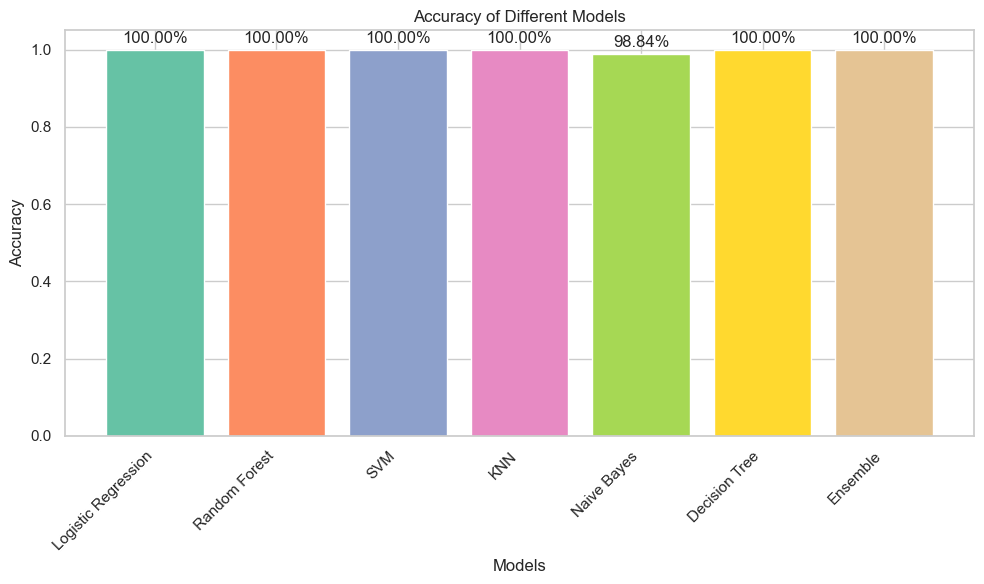

In [27]:
model_accuracies = {}

colors = sns.color_palette("Set2")

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

# Plotting the accuracies
plt.figure(figsize=(10, 6))

bars = plt.bar(model_accuracies.keys(), model_accuracies.values(), color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval*100:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
from sklearn.naive_bayes import GaussianNB
import pickle

# Assuming X_train, y_train are your training features and target
# Train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Save the model using pickle
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(nb, file)
